In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Ξεκιναμε με το να τραβιξουμε τα δεδομενα απο το αρχειο μας

In [17]:
Location = r'./Data/netflix_titles.csv'

df =  pd.read_csv(Location)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Ερωτημα 1

In [18]:
df1 = df.groupby('type', as_index=False).count()
df1 = df1[["type", "show_id"]]
df1.columns = ["Type", "Amount"]
df1

,Type,Amount
0,Movie,5377
1,TV Show,2410


### Ερωτημα 2

In [19]:
df2 = df.copy()
df2['date_added'] = pd.to_datetime(df2['date_added'], dayfirst=True)
df2['date_added'] = pd.DatetimeIndex(df2['date_added']).year
df2 = df2.sort_values('date_added')

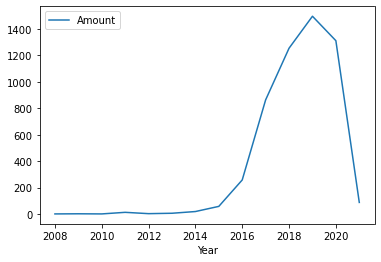

In [20]:
Movies = df2[df2["type"] == 'Movie']
Movies = Movies.groupby(["date_added"], as_index=False).count()
Movies = Movies[["date_added", "show_id"]]
Movies.columns = ["Year", "Amount"]

Movies.plot(x='Year', y='Amount', kind='line')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

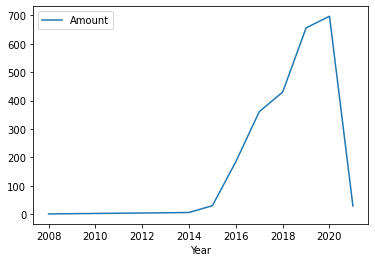

In [21]:
TV_Shows = df2[df2["type"] == 'TV Show']
TV_Shows = TV_Shows.groupby(["date_added"], as_index=False).count()
TV_Shows = TV_Shows[["date_added","show_id"]]
TV_Shows.columns = ["Year", "Amount"]

TV_Shows.plot(x='Year', y="Amount",kind='line')
plt.plot

### Ερωτημα 4

In [22]:
Location2 = r'./Data/IMDb movies.csv'

df4 =  pd.read_csv(Location2)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
df4 = df4.groupby(['genre', 'country'], as_index=False).count()
df4

,genre,country,imdb_title_id,title,original_title,year,date_published,duration,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,Action,Albania,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,1,0
1,Action,Algeria,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,1,1
2,Action,Argentina,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,1,1
3,Action,Australia,8,8,8,8,8,8,8,8,...,8,8,8,8,2,0,1,0,8,7
4,Action,Bangladesh,4,4,4,4,4,4,4,4,...,4,4,4,4,3,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18776,"Western, Drama",East Germany,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,1,1
18777,"Western, Drama","East Germany, Bulgaria, Cuba",1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,1,0
18778,"Western, Drama",USA,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,1,1
18779,"Western, Family","USA, Canada",1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,1,1


### Ερωτημα 6

In [24]:
df6 = df.copy()
df6 = df6.groupby(["type","rating"], as_index=False).count()

Little_Kids = ['G', 'TV-Y', 'TV-G']
Older_Kids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
Teens = ['PG-13', 'TV-14']
Mature = ['R', 'NC-17', 'TV-MA']


Movies

<BarContainer object of 4 artists>

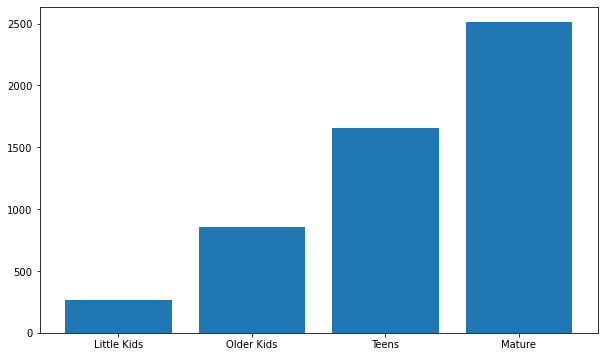

In [25]:
Movies6 = df6[df6["type"] == "Movie"]
Movies6 = Movies6[["rating", "show_id"]]
Movies6.columns = ["Rating", "Amount"]

NumberOfMovies = []
Categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']

Movies_little = Movies6[Movies6["Rating"].isin(Little_Kids)]
Movies_older = Movies6[Movies6["Rating"].isin(Older_Kids)]
Movies_Teens = Movies6[Movies6["Rating"].isin(Teens)]
Movies_Mature = Movies6[Movies6["Rating"].isin(Mature)]

NumberOfMovies.append(Movies_little['Amount'].sum())
NumberOfMovies.append(Movies_older['Amount'].sum())
NumberOfMovies.append(Movies_Teens['Amount'].sum())
NumberOfMovies.append(Movies_Mature['Amount'].sum())

fig = plt.figure(figsize=(10,6))
plt.bar(Categories,NumberOfMovies)


TV Shows

<BarContainer object of 4 artists>

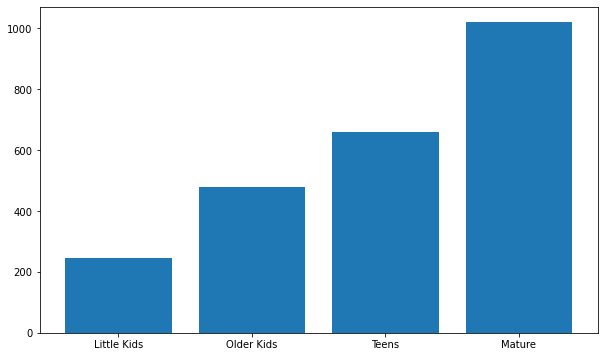

In [26]:
TV_Shows6 = df6[df6["type"] == "TV Show"]
TV_Shows6 = TV_Shows6[["rating", "show_id"]]
TV_Shows6.columns = ["Rating", "Amount"]

NumberOfTVShows = []
Categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']

TV_little = TV_Shows6[TV_Shows6['Rating'].isin(Little_Kids)]
TV_older = TV_Shows6[TV_Shows6['Rating'].isin(Older_Kids)]
TV_Teens = TV_Shows6[TV_Shows6['Rating'].isin(Teens)]
TV_Mature = TV_Shows6[TV_Shows6['Rating'].isin(Mature)]

NumberOfTVShows.append(TV_little['Amount'].sum())
NumberOfTVShows.append(TV_older['Amount'].sum())
NumberOfTVShows.append(TV_Teens['Amount'].sum())
NumberOfTVShows.append(TV_Mature['Amount'].sum())

fig = plt.figure(figsize=(10,6))
plt.bar(Categories,NumberOfTVShows)


### Ερωτημα 8

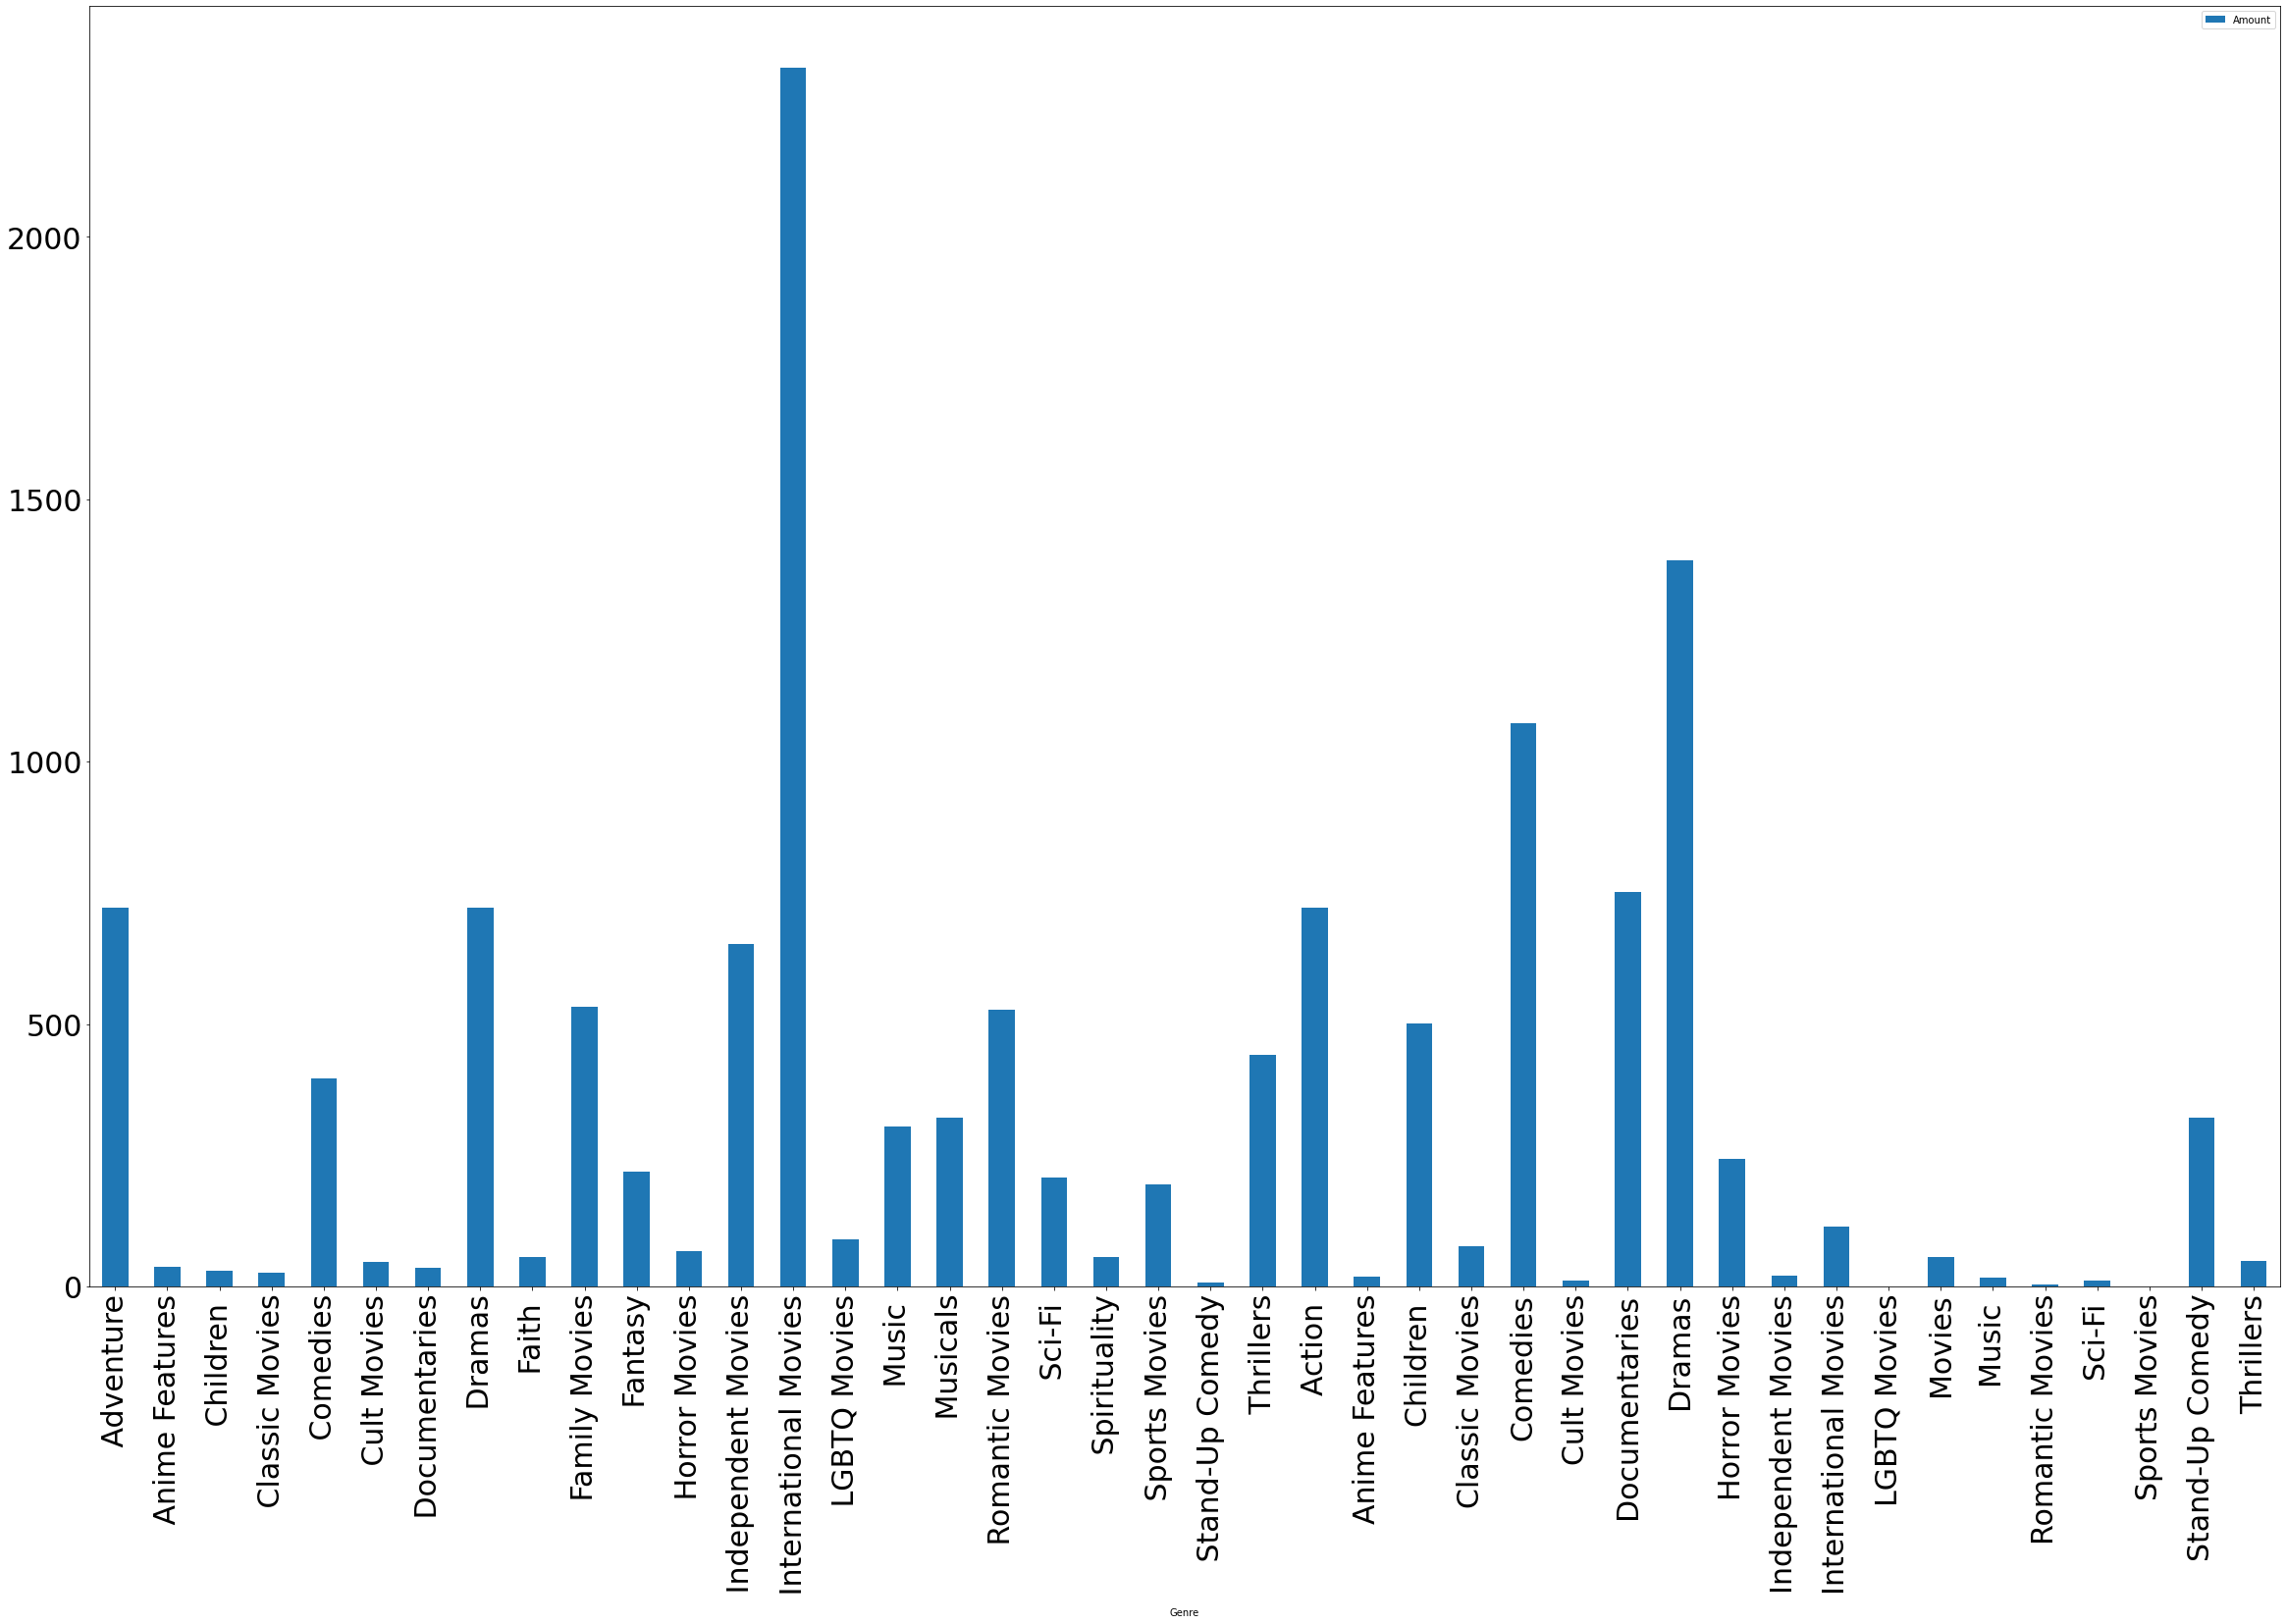

In [53]:
Movies8 = df.copy()
Movies8 = Movies8[Movies8["type"] == "Movie"]
Movies8 = Movies8.groupby(["listed_in"], as_index=False).count()
Movies8 = Movies8[['listed_in', 'show_id']]
Movies8.columns = ['Genre', 'Amount']
Movies8 = Movies8.reset_index()
Movies8['Genre'] = Movies8['Genre'].str.split(',')

    
Movies8 = (Movies8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))


Movies8['Genre'] = Movies8['Genre'].str.split('&')

    
Movies8 = (Movies8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))

Movies8 = Movies8.groupby(['Genre'], as_index=False).sum()

Movies8.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

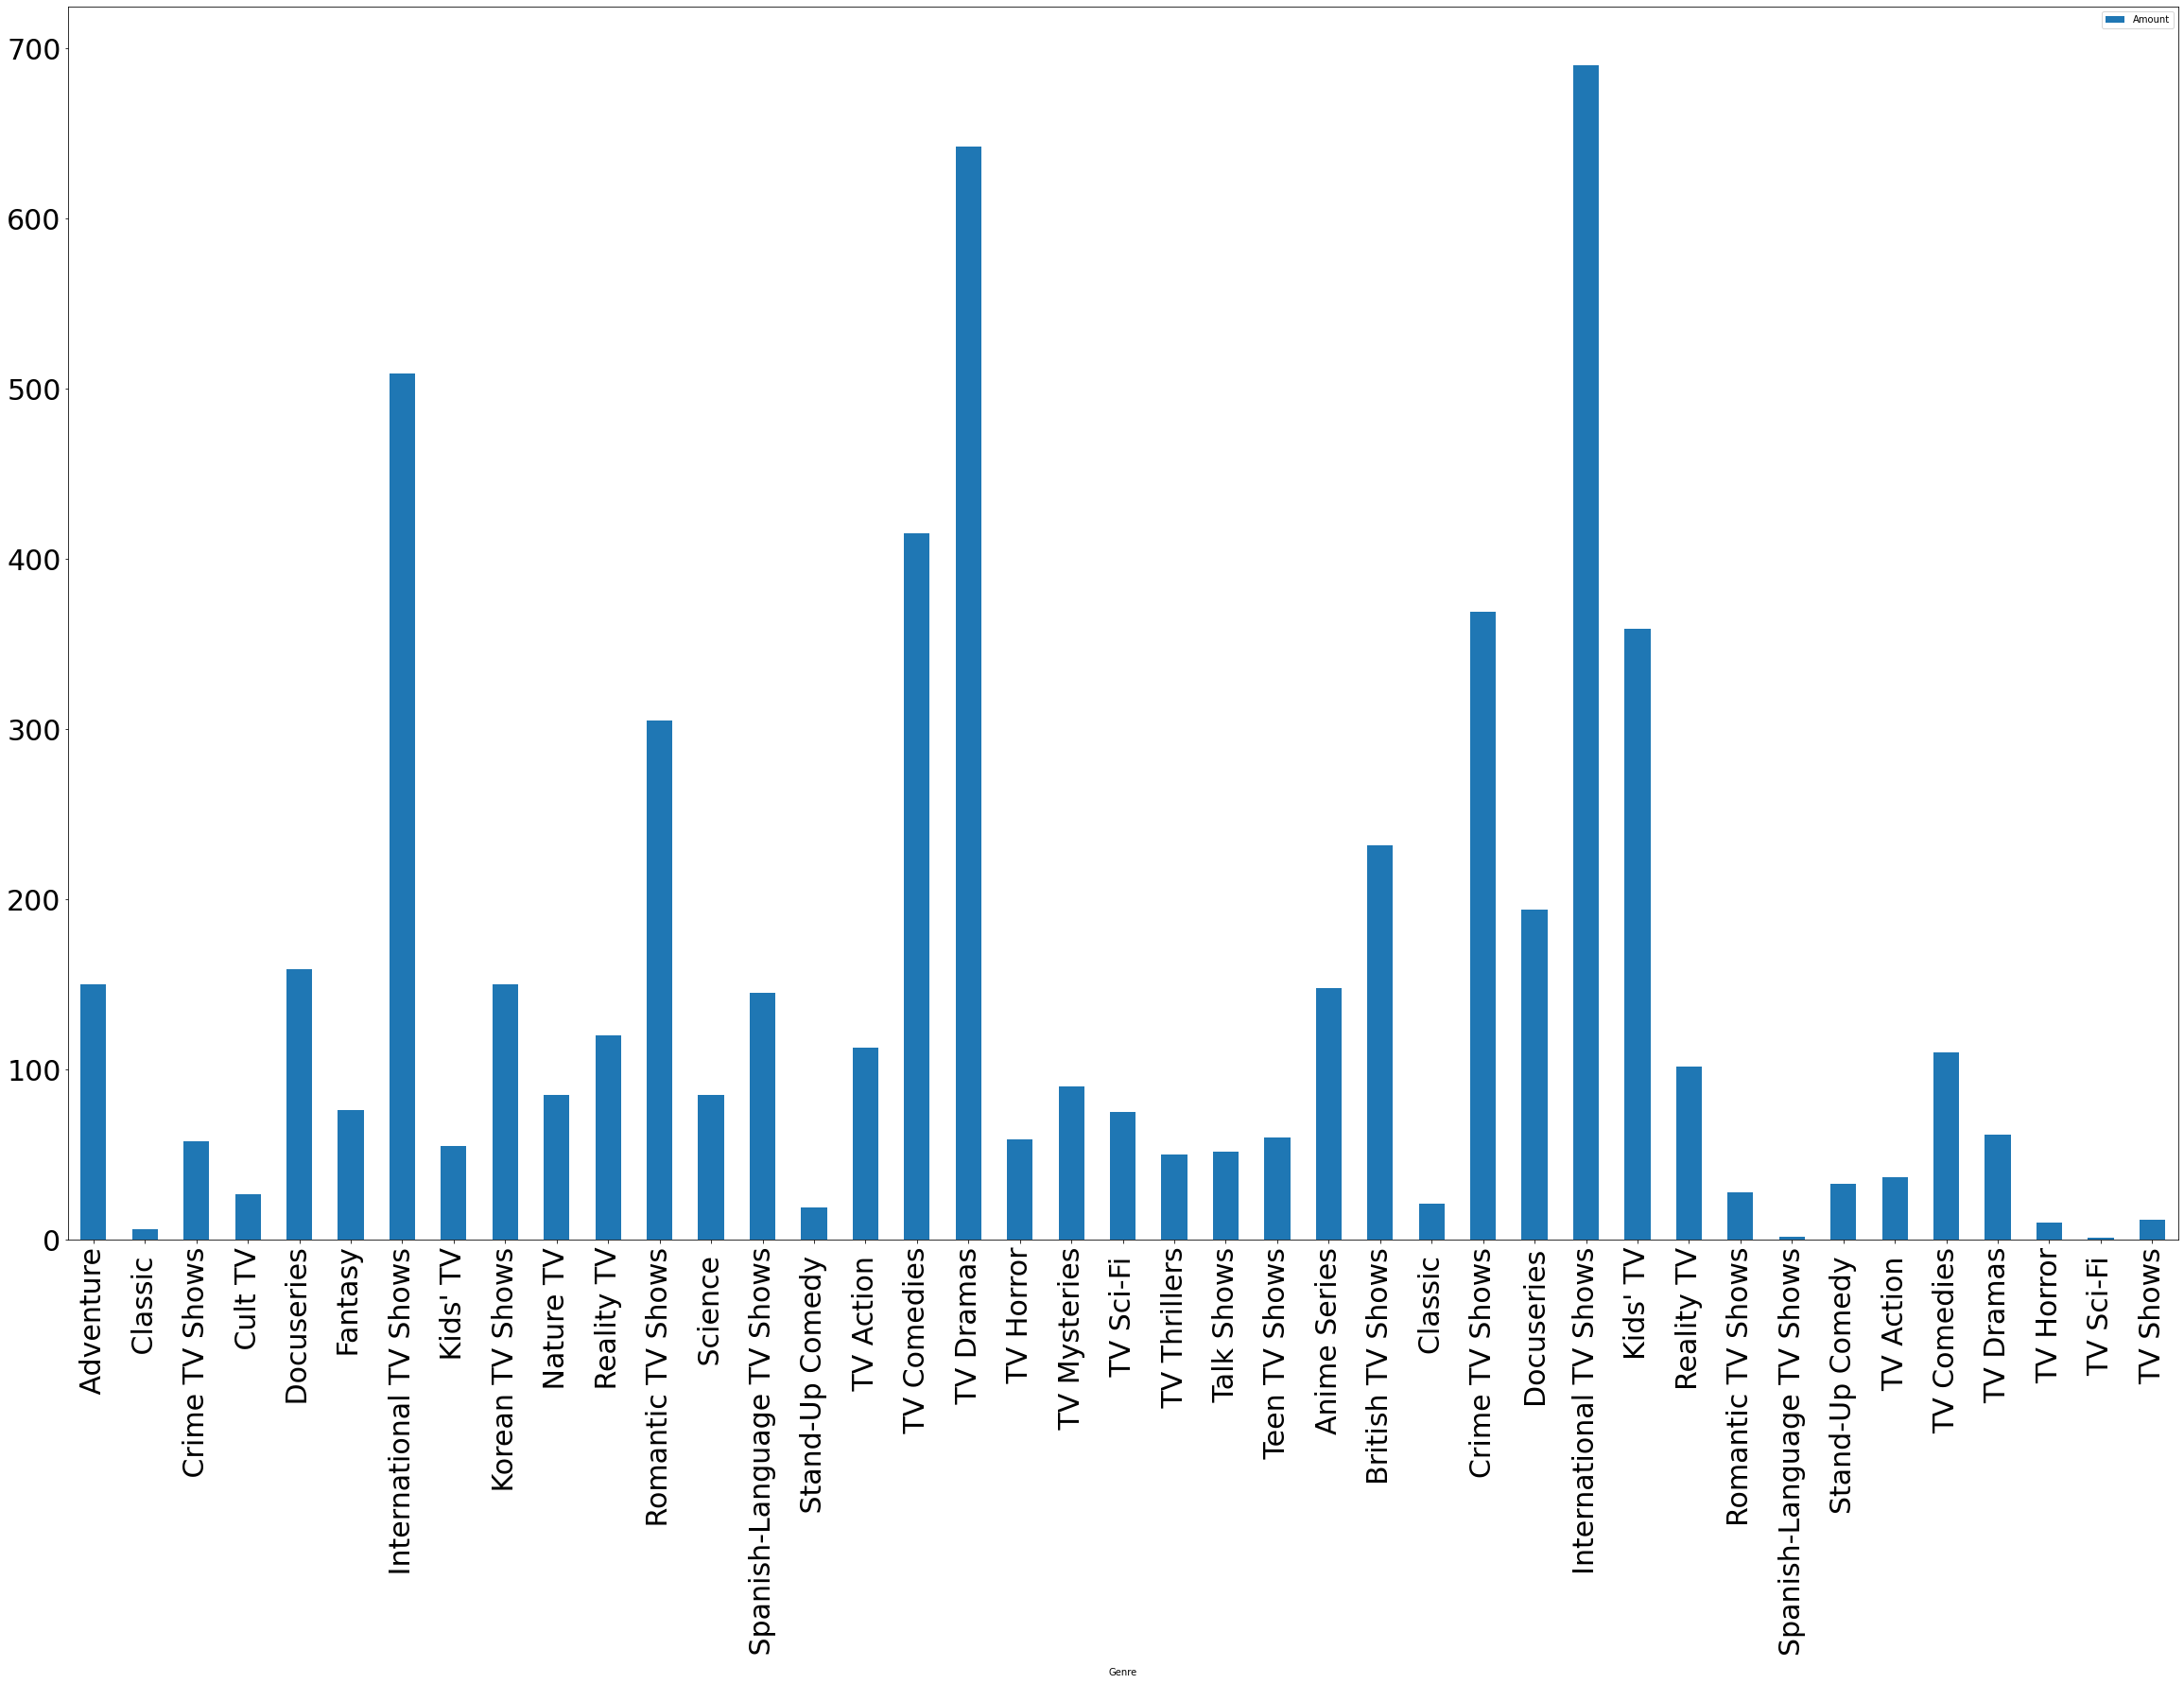

In [52]:
TV_Shows8 = df.copy()
TV_Shows8 = TV_Shows8[TV_Shows8["type"] == "TV Show"]
TV_Shows8 = TV_Shows8.groupby(["listed_in"], as_index=False).count()
TV_Shows8 = TV_Shows8[['listed_in', 'show_id']]
TV_Shows8.columns = ['Genre', 'Amount']
TV_Shows8 = TV_Shows8.reset_index()
TV_Shows8['Genre'] = TV_Shows8['Genre'].str.split(',')

    
TV_Shows8 = (TV_Shows8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))


TV_Shows8['Genre'] = TV_Shows8['Genre'].str.split('&')

    
TV_Shows8 = (TV_Shows8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))

TV_Shows8 = TV_Shows8.groupby(['Genre'], as_index=False).sum()

TV_Shows8.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

### Ερωτημα 10

[]

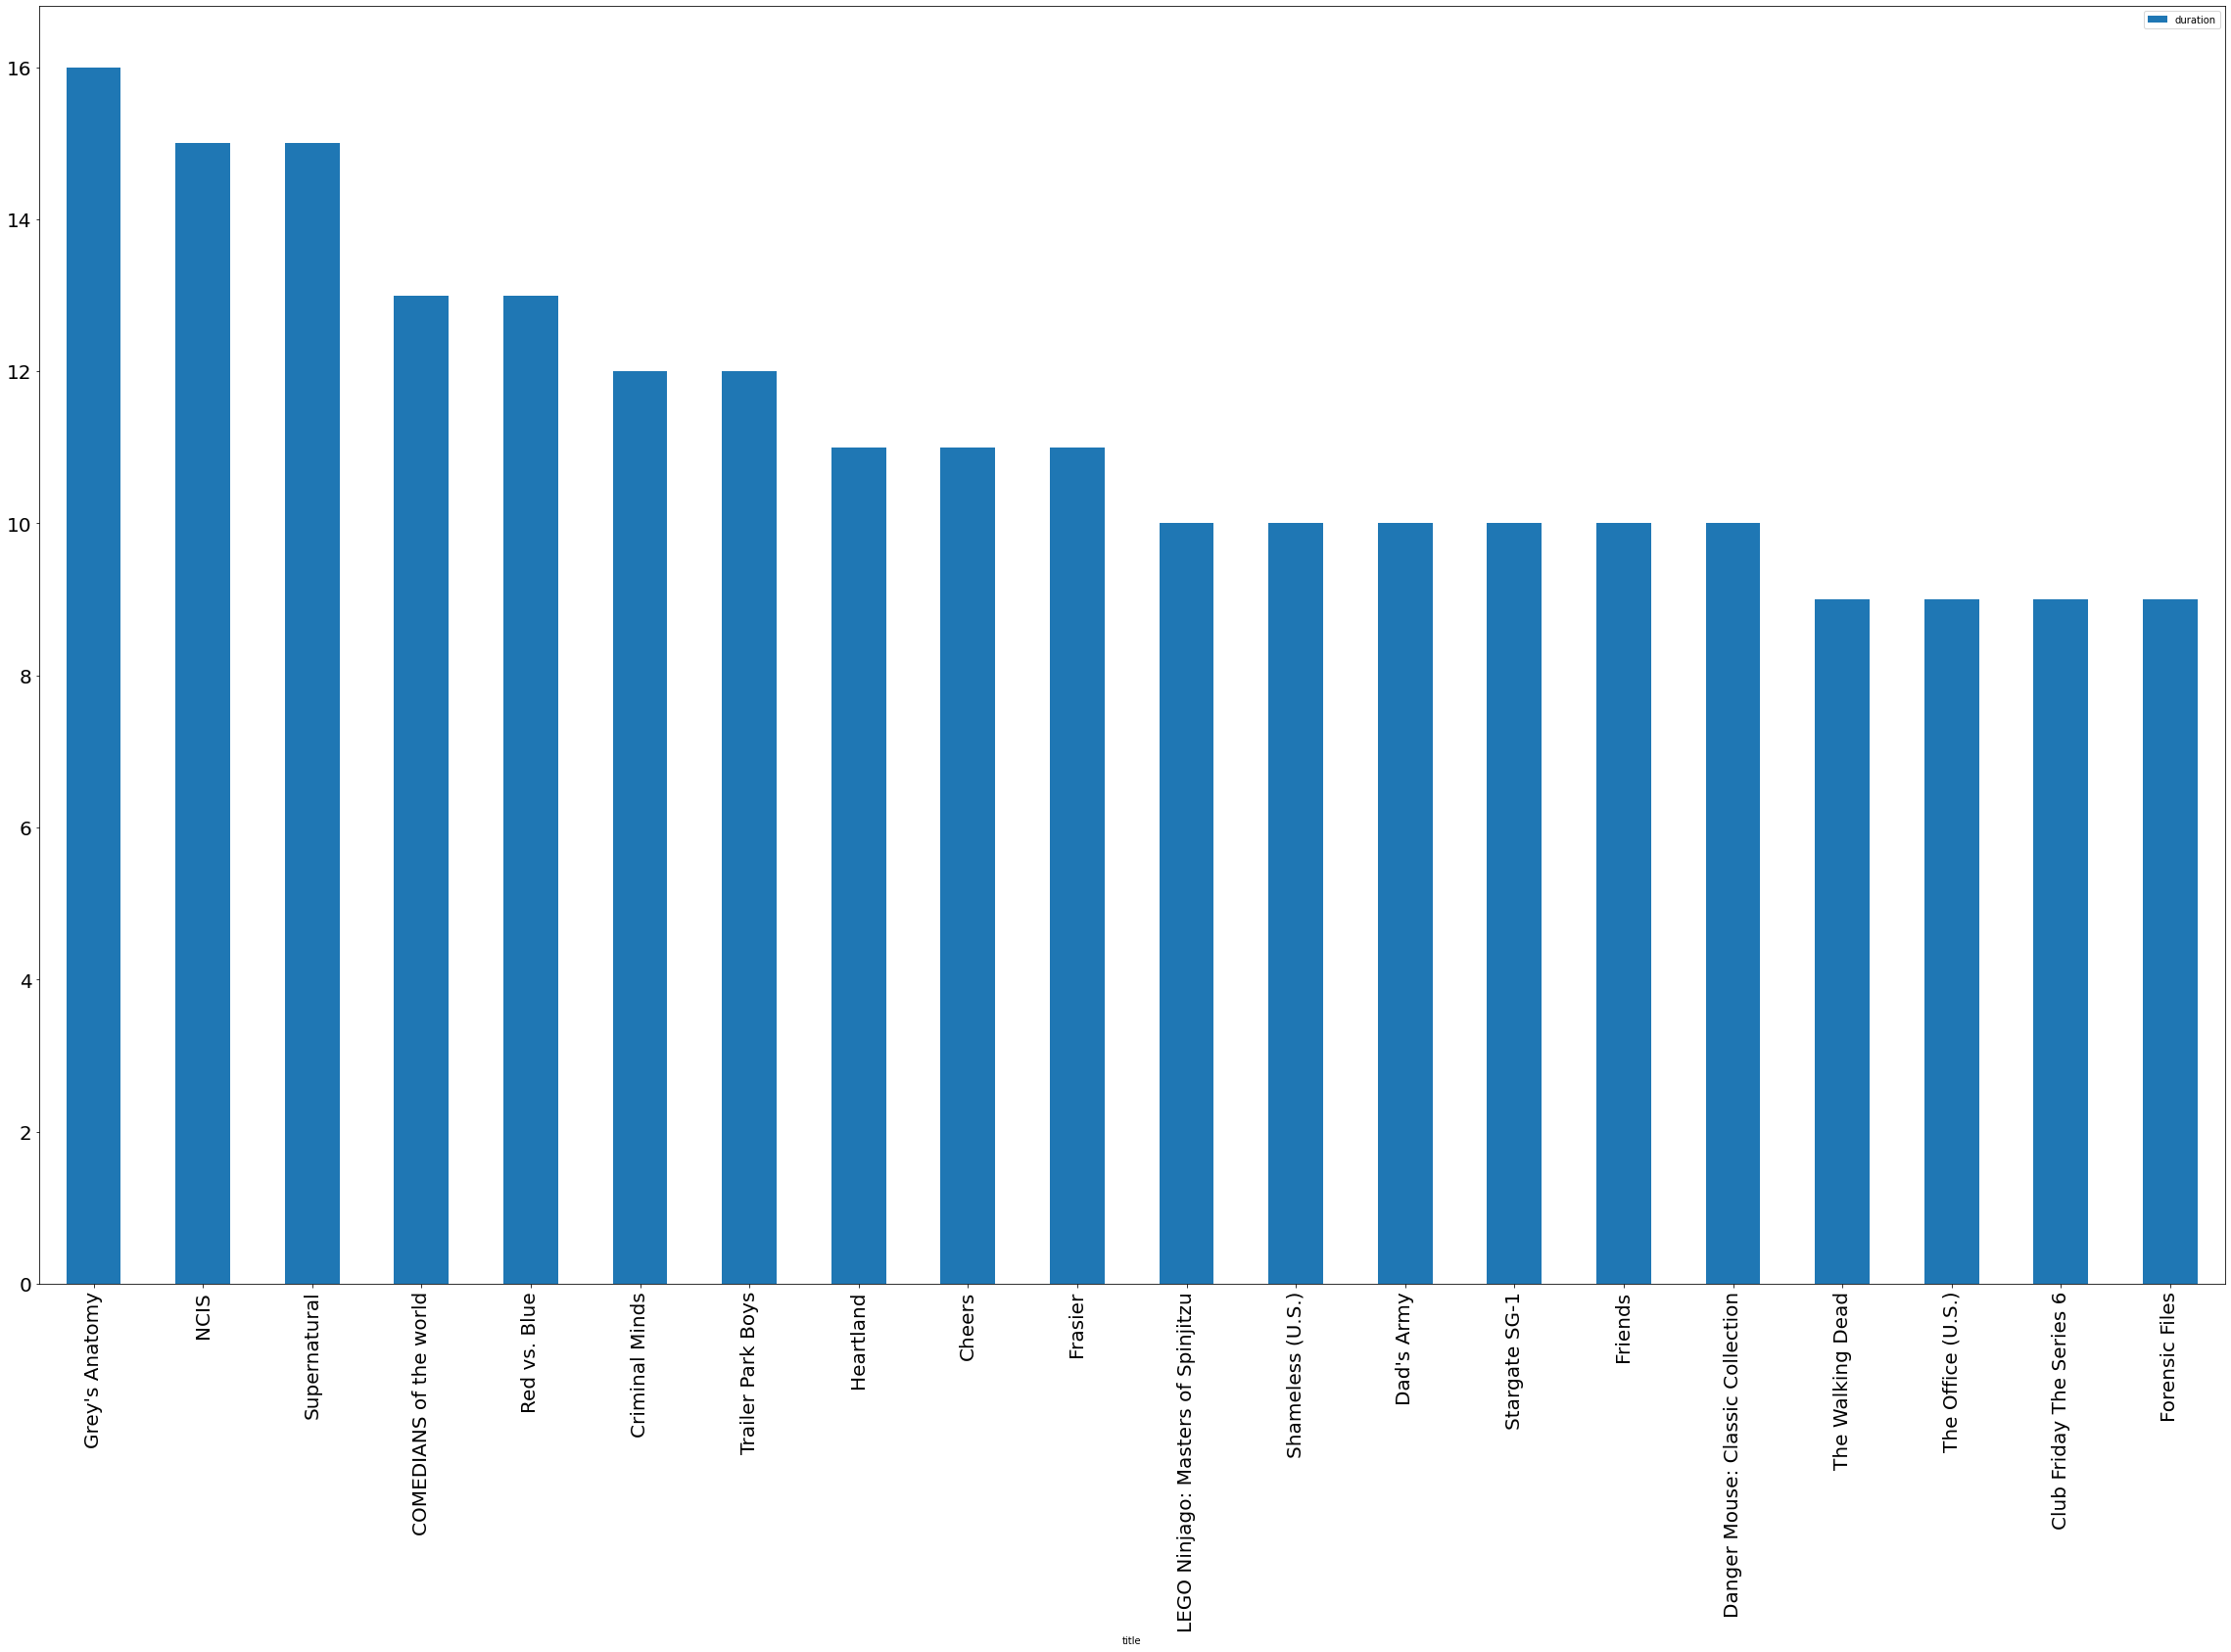

In [56]:
df10 = df.copy()
df10 = df10[df10["type"] == "TV Show"]
df10 = df10[["title", 'duration']]

def modifySeason(str):
    l = str.split()
    return int(l[0])

df10['duration'] = df10['duration'].apply(modifySeason)

df10 = df10.sort_values(by=['duration'], ascending=False)

df10 = df10.head(20)

df10.plot(x='title', y='duration', kind='bar', figsize=(40, 24), fontsize=20)
plt.plot()
